In [1]:
import numpy as np
import pandas as pd

In [2]:
nyc = pd.read_csv('nyc_311_data_subset-2.csv')

C:\Users\PC\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
nyc.head()

,Unique Key,Created Date,Closed Date,Agency,Incident Zip,Borough,Latitude,Longitude
0,1,10/11/2016 11:53:00 AM,10/11/2016 12:00:00 PM,DSNY,NaN,QUEENS,NaN,NaN
1,1,10/11/2016 11:36:00 AM,10/11/2016 12:00:00 PM,DSNY,NaN,QUEENS,NaN,NaN
2,1,10/11/2016 11:36:00 AM,10/11/2016 12:00:00 PM,DSNY,NaN,QUEENS,NaN,NaN
3,1,10/11/2016 12:39:00 PM,10/11/2016 12:39:00 PM,DSNY,NaN,QUEENS,NaN,NaN
4,1,10/11/2016 12:18:00 PM,10/11/2016 12:18:00 PM,DSNY,NaN,QUEENS,NaN,NaN


In [4]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971063 entries, 0 to 971062
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unique Key    971063 non-null  int64  
 1   Created Date  971063 non-null  object 
 2   Closed Date   882944 non-null  object 
 3   Agency        971063 non-null  object 
 4   Incident Zip  911140 non-null  object 
 5   Borough       971063 non-null  object 
 6   Latitude      887284 non-null  float64
 7   Longitude     887284 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 59.3+ MB


In [5]:
print(nyc['Unique Key'].unique())
del nyc['Unique Key']

[1]


In [6]:
nyc.head()

,Created Date,Closed Date,Agency,Incident Zip,Borough,Latitude,Longitude
0,10/11/2016 11:53:00 AM,10/11/2016 12:00:00 PM,DSNY,NaN,QUEENS,NaN,NaN
1,10/11/2016 11:36:00 AM,10/11/2016 12:00:00 PM,DSNY,NaN,QUEENS,NaN,NaN
2,10/11/2016 11:36:00 AM,10/11/2016 12:00:00 PM,DSNY,NaN,QUEENS,NaN,NaN
3,10/11/2016 12:39:00 PM,10/11/2016 12:39:00 PM,DSNY,NaN,QUEENS,NaN,NaN
4,10/11/2016 12:18:00 PM,10/11/2016 12:18:00 PM,DSNY,NaN,QUEENS,NaN,NaN


# Bad data

## Transforming bad data
The "Incident Zip" column contains lots of bad data.

In [7]:
nyc['Incident Zip'].unique()

array([nan, '10001', '11691', '11211', '10027', '10452', '11428', '11101',
       '10075', '11215', '11210', '11231', '11217', '10457', '10033',
       '11209', '11201', '11367', '10029', '10021', '10028', '10034',
       '10032', '10039', '11414', '10461', '11229', '10462', '11223',
       '10023', '10453', '11225', '11219', '10451', '11234', '10014',
       '11354', '11361', '10468', '11233', '10466', '11204', '11413',
       '11224', '11375', '11040', '11232', '11203', '11205', '11434',
       '10011', '10003', '10025', '10013', '10036', '11237', '11355',
       '11368', '10454', '10456', '10463', '11222', '11228', '11216',
       '10128', '11435', '11419', '11358', '11421', '10019', '11238',
       '11213', '11235', '11420', '10038', '11226', '10472', '10016',
       '11221', '11236', '11436', '11214', '11377', '11385', '11365',
       '10312', '11426', '11373', '11218', '10005', '11230', '10026',
       '10473', '10280', '10301', '10309', '10310', '10009', '10002',
       '11433',

In [8]:
# In general, we do this on a case by case basis.
# Not possible to make a function to fix every possible input format.

def fix_zip(code):
    try:
        code = int(float(code))
    except:
        try:
            code = int(code.split('-')[0])
        except:
            return np.NaN
        
    if not 10000 < code < 19999:
        return np.NaN
    
    return str(code)

fix_zip('12903-13') # Test.

'12903'

In [9]:
# We use apply because fix_zip takes a single string as argument.
nyc['Incident Zip'] = nyc['Incident Zip'].apply(fix_zip)

# An alternative solution could be to use:
# nyc['Incident Zip'] = fix_zip(nyc['Incident Zip'])
# But this would require fix_zip to accept and return Series.

### Cleaning data requires domain knowledge
To fix synonyms, mispellings, variable types (discrete vs categorical)...
### Cleaning data modifies the dataset
Every time we modify a dataset, we loose some information.

Is it always wise to get rid of everything that doesn't fit?

**Overcleaning** is a thing.

## Removing bad data
Some columns contain missing values.

In [10]:
nyc = nyc[nyc['Latitude'].notnull() &
          nyc['Longitude'].notnull() &
          nyc['Closed Date'].notnull() &
          nyc['Incident Zip'].notnull()]

nyc.head()

,Created Date,Closed Date,Agency,Incident Zip,Borough,Latitude,Longitude
10,09/01/2016 12:33:42 AM,09/16/2016 01:06:56 AM,DCA,10001,MANHATTAN,40.744790,-73.988834
11,09/01/2016 08:16:24 PM,09/10/2016 06:08:25 PM,HPD,11691,QUEENS,40.600554,-73.750704
12,09/01/2016 12:17:00 PM,09/07/2016 12:00:00 PM,DSNY,11211,BROOKLYN,40.704925,-73.962007
13,09/01/2016 12:10:22 PM,09/10/2016 02:23:44 PM,HPD,10027,MANHATTAN,40.812322,-73.955338
14,09/01/2016 12:32:32 PM,09/11/2016 02:03:37 AM,HPD,10452,BRONX,40.839529,-73.922534


**and** operates on two booleans, **&** is an element-wise operator.

**or** operates on two booleans, **|** is an element-wise operator.

**not** operates on a boolean, **!** is an element-wise operator.

In [11]:
print(True and True)
print(True and False)
print(False and False)

print(True or True)
print(True or False)
print(False or False)

print(not True)
print(not False)

b1 = pd.Series([True, True, False, False])
b2 = pd.Series([True, False, True, False])

print(b1 & b2)
print(b1 | b2)
print(~b1)
print(~b2)

True
False
False
True
True
False
False
True
0     True
1    False
2    False
3    False
dtype: bool
0     True
1     True
2     True
3    False
dtype: bool
0    False
1    False
2     True
3     True
dtype: bool
0    False
1     True
2    False
3     True
dtype: bool


## More data transformations
Not necessariy bad data, but changed to more convenient or computationally efficient formats.

In [12]:
#import datetime

# Better use pandas to convert the whole Series. Saves us using apply lambda constructs.
nyc['Created Date'] = pd.to_datetime(nyc['Created Date'])
nyc['Closed Date'] = pd.to_datetime(nyc['Closed Date'])

In [13]:
nyc.head()

,Created Date,Closed Date,Agency,Incident Zip,Borough,Latitude,Longitude
10,2016-09-01 00:33:42,2016-09-16 01:06:56,DCA,10001,MANHATTAN,40.744790,-73.988834
11,2016-09-01 20:16:24,2016-09-10 18:08:25,HPD,11691,QUEENS,40.600554,-73.750704
12,2016-09-01 12:17:00,2016-09-07 12:00:00,DSNY,11211,BROOKLYN,40.704925,-73.962007
13,2016-09-01 12:10:22,2016-09-10 14:23:44,HPD,10027,MANHATTAN,40.812322,-73.955338
14,2016-09-01 12:32:32,2016-09-11 02:03:37,HPD,10452,BRONX,40.839529,-73.922534


In [21]:
nyc['Processing Time'] = nyc['Closed Date'] - nyc['Created Date']
nyc.head()

,Created Date,Closed Date,Agency,Incident Zip,Borough,Latitude,Longitude,Processing Time
10,2016-09-01 00:33:42,2016-09-16 01:06:56,DCA,10001,MANHATTAN,40.744790,-73.988834,15 days 00:33:14
11,2016-09-01 20:16:24,2016-09-10 18:08:25,HPD,11691,QUEENS,40.600554,-73.750704,8 days 21:52:01
12,2016-09-01 12:17:00,2016-09-07 12:00:00,DSNY,11211,BROOKLYN,40.704925,-73.962007,5 days 23:43:00
13,2016-09-01 12:10:22,2016-09-10 14:23:44,HPD,10027,MANHATTAN,40.812322,-73.955338,9 days 02:13:22
14,2016-09-01 12:32:32,2016-09-11 02:03:37,HPD,10452,BRONX,40.839529,-73.922534,9 days 13:31:05


In [22]:
nyc['Processing Time'][10].days
nyc['Processing Time'][10].seconds
#nyc['Procesing Time'][10].microseconds
#nyc['Procesing Time'][10].nanoseconds

# Why do we want microseconds?
#import datetime
#start = datetime.datetime.now()
#do_something(inputs)
#finish = datetime.datetime.now()
#elapsed_time = finish - start

1994

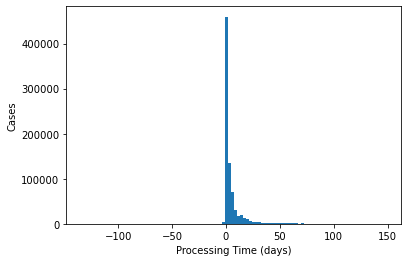

In [112]:
import matplotlib.pyplot as plt

plt.hist(nyc['Processing Time'] / np.timedelta64(1, 'D'), bins=100) # Don't need to use apply.

plt.xlabel('Processing Time (days)')
plt.ylabel('Cases')

plt.show()

Are negative _Processing Times_ caused by swapped _Created_ and _Closed_ dates?

In [41]:
nyc['Processing Time'].describe()

count                     806523
mean      4 days 23:57:59.176249
std      12 days 05:59:53.869236
min          -134 days +00:00:00
25%       0 days 02:34:24.500000
50%              0 days 21:05:32
75%              4 days 14:21:59
max            148 days 13:10:54
Name: Processing Time, dtype: object

In [66]:
print(sum(nyc['Processing Time'] / np.timedelta64(1, 'D') > 0))
print(sum(nyc['Processing Time'] / np.timedelta64(1, 'D') < 0))

766199
6419


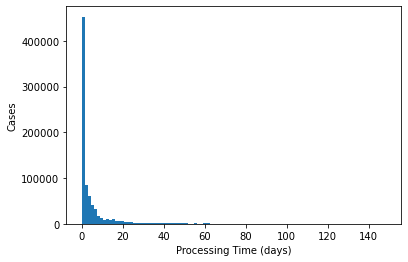

In [113]:
plt.hist(abs(nyc['Processing Time'] / np.timedelta64(1, 'D')), bins=100)

plt.xlabel('Processing Time (days)')
plt.ylabel('Cases')

plt.show()

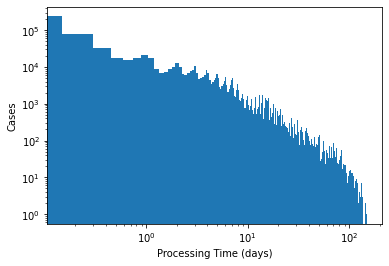

In [114]:
plt.hist(abs(nyc['Processing Time'] / np.timedelta64(1, 'D')), bins=1000)
plt.xscale('log')
plt.yscale('log')

plt.xlabel('Processing Time (days)')
plt.ylabel('Cases')

plt.show()

## Data Visualization

In [102]:
import gmplot # Documentation at https://github.com/gmplot/gmplot/wiki

gmap = gmplot.GoogleMapPlotter(40.6588258, -74.1447601, 10) # Coordinates copied from Google Maps.

In [103]:
s = nyc.sample(5000)
gmap.scatter(s['Latitude'], s['Longitude'], c='r', marker=False)
gmap.draw('nyc.html')

## Grouping data

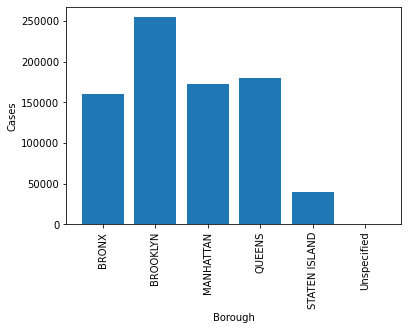

In [116]:
b = nyc.groupby('Borough').size()

plt.bar(b.index, b)

plt.xticks(rotation=90)
plt.xlabel('Borough')
plt.ylabel('Cases')

plt.show()

Is Brooklyn more problematic than Staten Island, or does it simply have more population?

In general, it's a bad idea to work with raw counts.

$ Normalized = \frac{Observed}{Expected} $

The units normalized count, in this case, could be **cases per 1,000 inhabitants**, for instance.

### A note on grouping:

In [144]:
new_nyc = nyc.copy()
days = abs(new_nyc['Processing Time'] / np.timedelta64(1, 'D'))

# Using pandas interface to create a grouping variable:
new_nyc['Binned Processing Times'] = 'Medium'
new_nyc.loc[days < 10, 'Binned Processing Times'] = 'Low'
new_nyc.loc[days > 50, 'Binned Processing Times'] = 'High'

grouped_nyc = new_nyc.groupby('Binned Processing Times')

# is probably easier, more readable, and more explicit than:
def time_groups(df, i):
    days = abs(df.loc[i, 'Processing Time'] / np.timedelta64(1, 'D'))
    
    if days < 10:
        return 'Low'
    if days < 50:
        return 'Medium'
    else:
        return 'High'

grouped_nyc_fun = new_nyc.head(1000).groupby(lambda x: time_groups(new_nyc.head(1000), x))


print(grouped_nyc.groups)
print(grouped_nyc_fun.groups)

{'High': Int64Index([   577,    773,    776,    904,    943,    990,    992,   1038,
              1080,   1096,
            ...
            970502, 970517, 970524, 970557, 970633, 970650, 970668, 971003,
            971021, 971048],
           dtype='int64', length=15215), 'Low': Int64Index([    11,     12,     13,     14,     15,     16,     18,     19,
                27,     29,
            ...
            971045, 971046, 971050, 971051, 971052, 971054, 971055, 971056,
            971058, 971060],
           dtype='int64', length=699566), 'Medium': Int64Index([    10,     17,     20,     21,     22,     23,     24,     25,
                26,     32,
            ...
            970773, 970826, 970867, 970908, 970918, 970923, 970978, 971059,
            971061, 971062],
           dtype='int64', length=91742)}
{'High': Int64Index([577, 773, 776, 904, 943, 990, 992, 1038], dtype='int64'), 'Low': Int64Index([  11,   12,   13,   14,   15,   16,   18,   19,   27,   29,
            ...
 

In [146]:
new_nyc.head(20)

,Created Date,Closed Date,Agency,Incident Zip,Borough,Latitude,Longitude,Processing Time,Binned Processing Times
10,2016-09-01 00:33:42,2016-09-16 01:06:56,DCA,10001,MANHATTAN,40.744790,-73.988834,15 days 00:33:14,Medium
11,2016-09-01 20:16:24,2016-09-10 18:08:25,HPD,11691,QUEENS,40.600554,-73.750704,8 days 21:52:01,Low
12,2016-09-01 12:17:00,2016-09-07 12:00:00,DSNY,11211,BROOKLYN,40.704925,-73.962007,5 days 23:43:00,Low
13,2016-09-01 12:10:22,2016-09-10 14:23:44,HPD,10027,MANHATTAN,40.812322,-73.955338,9 days 02:13:22,Low
14,2016-09-01 12:32:32,2016-09-11 02:03:37,HPD,10452,BRONX,40.839529,-73.922534,9 days 13:31:05,Low
15,2016-09-01 20:16:24,2016-09-10 18:08:24,HPD,11691,QUEENS,40.600554,-73.750704,8 days 21:52:00,Low
16,2016-09-01 08:35:00,2016-09-07 12:00:00,DSNY,11428,QUEENS,40.721866,-73.745982,6 days 03:25:00,Low
17,2016-09-01 13:19:42,2016-09-16 14:32:35,DOT,11101,QUEENS,40.746875,-73.952711,15 days 01:12:53,Medium
18,2016-09-01 11:00:00,2016-09-08 12:00:00,DSNY,10075,MANHATTAN,40.773336,-73.955054,7 days 01:00:00,Low
19,2016-09-01 11:45:00,2016-09-03 12:00:00,DSNY,11215,BROOKLYN,40.662002,-73.983668,2 days 00:15:00,Low


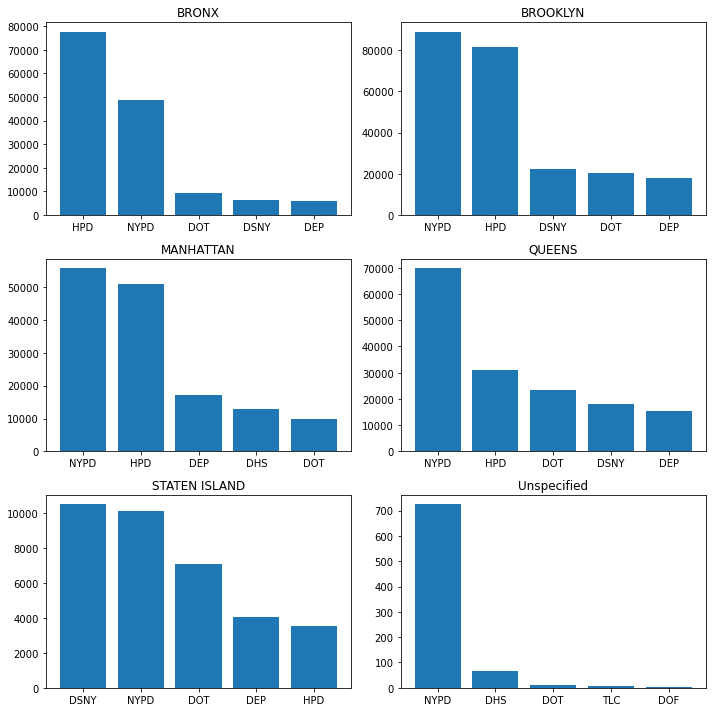

In [165]:
agency_borough = nyc.groupby(['Agency', 'Borough']).size().unstack()

fig, ax = plt.subplots(3, 2, figsize=(10, 10))

for i, (label, col) in enumerate(agency_borough.iteritems()):
    r, c = int(i / 2), i % 2
    count = col.sort_values(ascending=False).head()
    ax[r, c].bar(count.index, count)
    
    ax[r, c].set_title(label)
    
plt.tight_layout()
plt.show()